# Примеры и упражнения по Python3 - уровень с графикой

Автор-составитель - Михаил Колодин

Версия 2021-04-21 от 2021-05-23 - 3.3

Разделы:
* Библиотека PIL
    * [Случайное искусство](#randart)
    * [Тетрадки](#copybooks)
    * [Неквадратные плоскости](#nonsquare)

---
**Случайное искусство** <a name=randart>

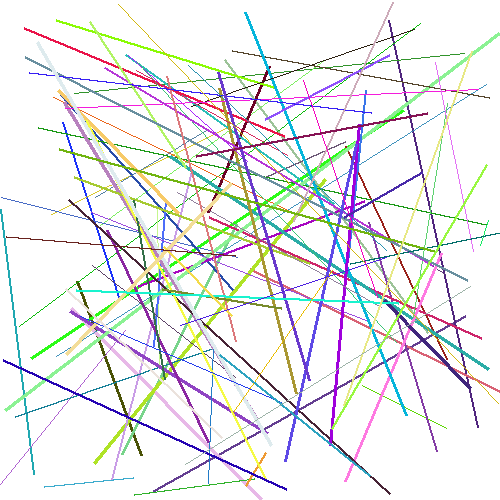

In [14]:
from PIL import Image, ImageDraw
import random
ri = random.randint

SIZE = 500
WHITE = 255, 255, 255
BLACK = 0, 0, 0
COUNT = 100

im = Image.new('RGB', (SIZE, SIZE), WHITE)
draw = ImageDraw.Draw(im)
 
for i in range(COUNT):
    p1x = ri(0, SIZE)
    p1y = ri(0, SIZE)
    p2x = ri(0, SIZE)
    p2y = ri(0, SIZE)
    rcolor = ri(0, 255), ri(0, 255), ri(0, 255)
    rwidth = ri(1, 3)
    draw.line((p1x, p1y, p2x, p2y), fill=rcolor, width=rwidth)
 
#im.show()
im.save('pil-cp01.jpg', quality=95)
im

**Тетрадки** <a name=randart>

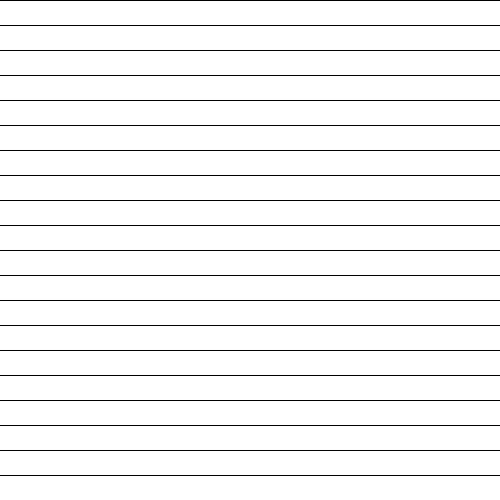

In [21]:
im = Image.new('RGB', (SIZE, SIZE), WHITE)
draw = ImageDraw.Draw(im)
 
for i in range(0, SIZE, SIZE//20):
    draw.line((0, i, SIZE, i), fill=BLACK, width=1)
 
#im.show()
im.save('pil-cp02.jpg', quality=95)
im

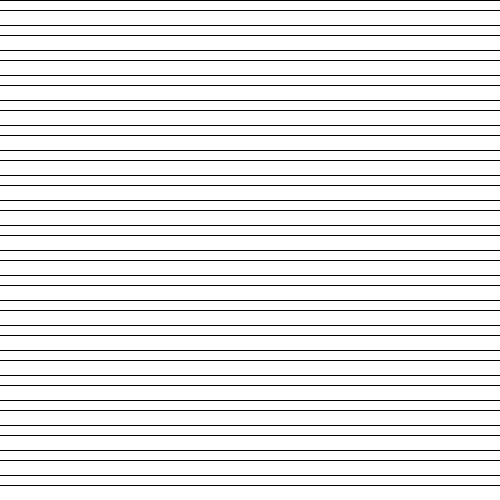

In [22]:
im = Image.new('RGB', (SIZE, SIZE), WHITE)
draw = ImageDraw.Draw(im)
 
for i in range(0, SIZE, SIZE//20):
    draw.line((0, i, SIZE, i), fill=BLACK, width=1)
    draw.line((0, i+10, SIZE, i+10), fill=BLACK, width=1)
 
#im.show()
im.save('pil-cp03.jpg', quality=95)
im

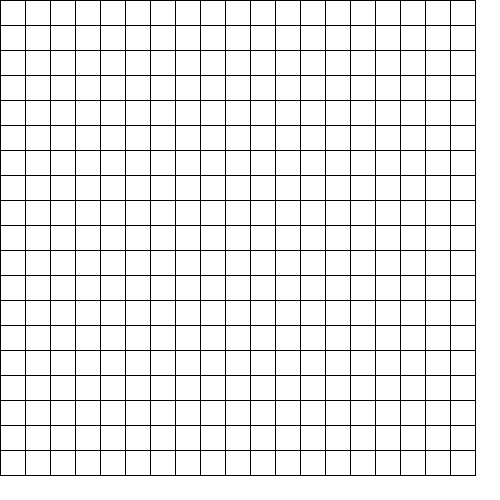

In [40]:
im = Image.new('RGB', (SIZE, SIZE), WHITE)
draw = ImageDraw.Draw(im)

STEPS = 20
BDR = (SIZE-1) // STEPS * STEPS -5
LMT = BDR
for i in range(0, SIZE, SIZE // STEPS):
    draw.line((0, i, LMT, i), fill=BLACK, width=1)
    draw.line((i, 0, i, LMT), fill=BLACK, width=1)
 
#im.show()
im.save('pil-cp04.jpg', quality=95)
im

---
**Неквадратные плоскости** <a name=nonsquare></a>

***Примитивные треугольники (не правильные)***

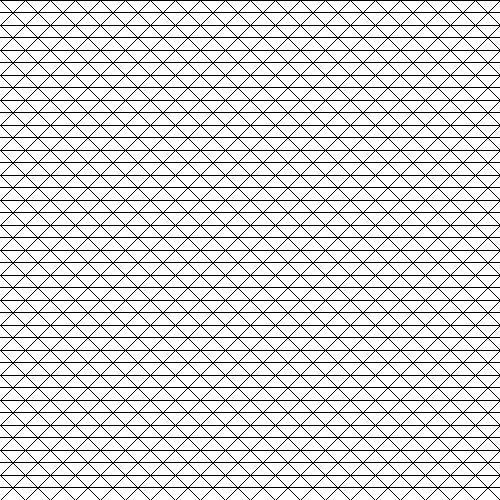

In [46]:
im = Image.new('RGB', (SIZE, SIZE), WHITE)
draw = ImageDraw.Draw(im)

STEPS = 20
for i in range(0, SIZE, SIZE // STEPS):
    draw.line((0, i, i, 0), fill=BLACK, width=1)
    draw.line((i, SIZE, SIZE, i), fill=BLACK, width=1)

    draw.line((0, i, SIZE-i, SIZE), fill=BLACK, width=1)
    draw.line((i, 0, SIZE, SIZE-i), fill=BLACK, width=1)

    draw.line((0, i, SIZE, i), fill=BLACK, width=1)
    draw.line((0, i//2, SIZE, i//2), fill=BLACK, width=1)
    draw.line((0, SIZE//2 + i//2, SIZE, SIZE//2 + i//2), fill=BLACK, width=1)

#im.show()
im.save('pil-cp05.jpg', quality=95)
im

---
***Правильные треугольники***

In [35]:
# init all
from PIL import Image, ImageDraw
from math import sin, cos, pi
import copy

SIZE = 500
WHITE = 255, 255, 255
BLACK = 0, 0, 0

grad = pi / 180.
#eps = 1 / 64
rdig = 3  # round to rdig digits after decimal point
LIM = 10.

# 1st triangle (tri)
ax = ay = 0.
bx = 1.; by = 0.
cx = cos(60. *grad)
cy = sin(60. *grad)
cx = round(cx, rdig)
cy = round(cy, rdig)
print(f"{rdig=}, {grad=}")
print(f"{ax=}, {ay=}, {bx=}, {by=}, {cx=}, {cy=}")
tri = (ax, ay), (bx, by), (cx, cy)
print(f"{tri=}")
alltri = {tri}
print(f"{alltri=}")
points = set()
points |= {y for x in alltri for y in x}
print(f"{points=}")
allotr = { (ax, ay, bx, by), (bx, by, cx, cy), (cx, cy, ax, ay) }
print(f"{allotr=}")

rdig=3, grad=0.017453292519943295
ax=0.0, ay=0.0, bx=1.0, by=0.0, cx=0.5, cy=0.866
tri=((0.0, 0.0), (1.0, 0.0), (0.5, 0.866))
alltri={((0.0, 0.0), (1.0, 0.0), (0.5, 0.866))}
points={(1.0, 0.0), (0.5, 0.866), (0.0, 0.0)}
allotr={(0.5, 0.866, 0.0, 0.0), (0.0, 0.0, 1.0, 0.0), (1.0, 0.0, 0.5, 0.866)}


In [222]:
def reflect(a, b, c):
    """ reflect point c rel to [a, b]"""
    # reflection point
    rx = (a[0] + b[0]) / 2 
    ry = (a[1] + b[1]) / 2
    cx, cy = c
    # d = reflected c point
    if rx >= cx:
        dx = rx + (rx - cx)
    else:
        dx = rx - (cx - rx)
    if ry >= cy:
        dy = ry + (ry - cy)
    else:
        dy = ry - (cy - ry)
    return round(dx, rdig), round(dy, rdig)

In [223]:
def inlims(tri):
    """ check if tri is within limits: 0 <= tri <= LIM"""
    return (
        0. <= tri[0][0] <= LIM and
        0. <= tri[0][1] <= LIM and
        0. <= tri[1][0] <= LIM and
        0. <= tri[1][1] <= LIM and
        0. <= tri[2][0] <= LIM and
        0. <= tri[2][1] <= LIM 
        )

In [224]:
def make1(a, b, c):
    """ make 1 new triangle, reflecting point c relatevely to line [a, b],
    use LIMits, only 0 <= x,y <= LIM,
    reorder points to normalize result
    """
    nt = [a, b, reflect(a, b, c)]
    if inlims(nt):
        snt = sorted(nt)
        return tuple(snt)
    else:
        return tuple()        

In [225]:
def make3(tri):
    """ make 3 new tri-s (if within LIMits)"""
    nt1 = make1(tri[0], tri[1], tri[2])
    nt2 = make1(tri[1], tri[2], tri[0])
    nt3 = make1(tri[0], tri[2], tri[1])
    nl = [nt1, nt2, nt3]
    nts = [x for x in nl if len(x)]
    return nts    

In [251]:
def maketri():
    """ make other tri-s """
    global alltri
    dotri = copy.copy(alltri)
    print(dotri)
    #rep = 0
    while True:
        #rep += 1
        #if rep > 3000: break
        newtri = set()
        for tri in dotri:
            addtri = make3(tri)
            for nt in addtri:
                if nt not in alltri:
                    newtri |= {nt}
        if len(newtri) == 0: 
            break
        alltri |= newtri
        dotri = copy.copy(newtri)        

In [227]:
def makeotr():
    """ make all lines"""
    global allotr
    print(f"we had {len(alltri)} triangles")
    allotr = set()
    for tri in alltri:
        #print("triangle:", tri)
        a, b, c = tri
        side = tuple(sorted([a, b]))
        allotr |= {side}
        side = tuple(sorted([a, c]))
        allotr |= {side}
        side = tuple(sorted([b, c]))
        allotr |= {side}
    print(f"we have {len(allotr)} sides")

{((0.0, 0.0), (1.0, 0.0), (0.5, 0.866))}
we had 210 triangles
we have 334 sides


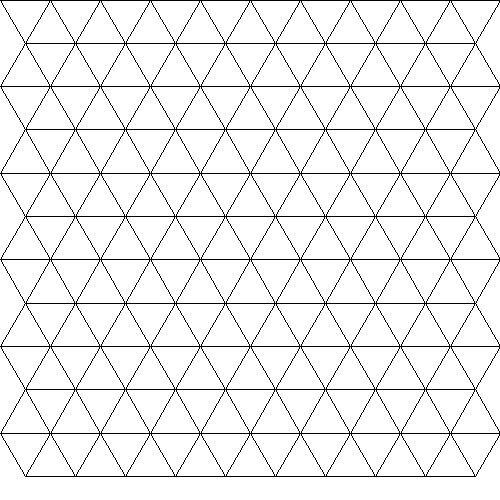

In [253]:
SCALE = 50.
SIZE = 500
im = Image.new('RGB', (SIZE, SIZE), WHITE)
draw = ImageDraw.Draw(im)

maketri()
#print(alltri)

#print("before:", allotr)
makeotr()
#print("after:", allotr)

for otr in allotr:
    #print(otr)
    sotr = otr[0][0]*SCALE, otr[0][1]*SCALE, otr[1][0]*SCALE, otr[1][1]*SCALE
    draw.line(sotr, fill=BLACK, width=1)
    
#im.show()
im.save('pil-cp06.jpg', quality=95)
im

---
***Правильные шестиугольники (соты)***

In [236]:
# init all
from PIL import Image, ImageDraw
from math import sin, cos, pi, sqrt
import copy

# picture size inpixels
SIZE = 500

# colors
WHITE = 255, 255, 255
BLACK = 0, 0, 0

# math setup
GRAD = pi / 180.  # 1 degree in radians
RDIG = 3    # round to rdig digits after decimal point
LIM = 10.   # size of picture in relative values
LMIN = -1.5 # exclude hexes with left or upper side less than LMIN
LMAX = 11.5 # exclude hexes with right or lower side greater than LMAX
DELTA = .1 # delta


In [237]:
# start with 0, 0
ax = ay = 0.
allhex = set()
allsides = set()
allpoints = set()

# roots
xx = 1.5
xh = sqrt(3.)
xy = xx / 2.
print(f"{xx=}, {xy=}, {xh=}")

xx=1.5, xy=0.75, xh=1.7320508075688772


In [238]:
def corrpoints1(x, y):
    """ correct values for points """
    return x, y

def corrpoints(x, y):
    """ correct values for points """
    global allpoints
    ox, oy = x, y
    ox = round(ox, RDIG)
    oy = round(oy, RDIG)
    
    for ap in allpoints:
        px, py = ap
        if abs(ox - px) <= DELTA and abs(oy - py) <= DELTA:
            ox = px
            oy = py
            break
    else:
        allpoints |= {(ox, oy)}
    
    return ox, oy

In [239]:
def makehex(p):
    """ make hex
    calculate vertices, sides
    """
    global allsides, allhex, allpoints
    ox, oy = p
    ox = round(ox, RDIG)
    oy = round(oy, RDIG)
    
    ox, oy = corrpoints(ox, oy)
   
    print((ox, oy), end=", ")
    ax = ox + 1
    ay = oy
    ax, ay = corrpoints(ax, ay)
    
    bx = ox + cos(60. * GRAD)
    by = oy + sin(60. * GRAD)
    bx, by = corrpoints(bx, by)

    cx = ox - cos(60. * GRAD)
    cy = by
    cx, cy = corrpoints(cx, cy)

    dx = ox - 1
    dy = oy
    dx, dy = corrpoints(dx, dy)

    ex = cx
    ey = oy - sin(60. * GRAD)
    ex, ey = corrpoints(ex, ey)

    fx = bx
    fy = ey
    fx, fy = corrpoints(fx, fy)

    sides =  [[(ax, ay), (bx, by)], 
             [(bx, by), (cx, cy)], 
             [(cx, cy), (dx, dy)],
             [(dx, dy), (ex, ey)],
             [(ex, ey), (fx, fy)],
             [(fx, fy), (ax, ay)]]
    sides = [sorted(s) for s in sides]
    
    for side in sides:
        allsides |= {tuple(side)}

    allhex |= {(ox, oy)} 


In [240]:
def inlim(x, y):
    """ check if x, y are within LIMits """
    return x > LMIN and y > LMIN and x < LMAX and y < LMAX

In [241]:
def tryhex(x, y):
    """ try to put hex 
    and try recursively
    """
    x, y = corrpoints(x, y)
    
    if (x, y) in allhex:
        return

    if not inlim(x, y):
        return

    makehex((x, y))

    nx = round(x + xx, RDIG)
    ny = round(y + xy, RDIG)
    nx, ny = corrpoints(nx, ny)
    tryhex(nx, ny)
    
    nx = x
    ny = round(y + xh, RDIG)
    nx, ny = corrpoints(nx, ny)
    tryhex(nx, ny)
    
    nx = round(x - xx, RDIG)
    ny = round(y + xy, RDIG)
    nx, ny = corrpoints(nx, ny)
    tryhex(nx, ny)
    
    nx = round(x - xx, RDIG)
    ny = round(y - xy, RDIG)
    nx, ny = corrpoints(nx, ny)
    tryhex(nx, ny)

    nx = x
    ny = round(y - xh, RDIG)
    nx, ny = corrpoints(nx, ny)
    tryhex(nx, ny)

    nx = round(x + xx, RDIG)
    ny = round(y - xy, RDIG)
    nx, ny = corrpoints(nx, ny)
    tryhex(nx, ny)


In [242]:
# run all
start = LIM / 2.
tryhex(start, start)

(5.0, 5.0), (6.5, 5.75), (8.0, 6.5), (9.5, 7.25), (11.0, 8.0), (11.0, 9.732), (11.0, 11.464), (9.5, 10.714), (8.0, 11.464), (6.5, 10.714), (5.0, 11.464), (3.5, 10.714), (2.0, 11.464), (0.5, 10.714), (-1.0, 11.464), (-1.0, 9.732), (0.5, 10.482), (2.0, 11.232), (2.0, 9.5), (3.5, 10.25), (5.0, 11.0), (5.0, 9.268), (6.5, 10.018), (8.0, 10.768), (8.0, 9.036), (9.5, 9.786), (11.0, 10.536), (9.5, 11.286), (8.0, 10.536), (6.5, 11.286), (5.0, 10.536), (3.5, 11.286), (2.0, 10.536), (0.5, 11.286), (-1.0, 10.536), (-1.0, 8.804), (0.5, 9.554), (2.0, 10.304), (3.5, 11.054), (3.5, 9.322), (5.0, 10.072), (6.5, 10.822), (6.5, 9.09), (8.0, 9.84), (9.5, 10.59), (11.0, 11.34), (11.0, 9.608), (9.5, 10.358), (11.0, 11.108), (11.0, 9.376), (9.5, 10.126), (11.0, 10.876), (11.0, 9.144), (9.5, 9.894), (11.0, 10.644), (9.5, 11.394), (8.0, 10.644), (6.5, 11.394), (5.0, 10.644), (3.5, 11.394), (2.0, 10.644), (0.5, 11.394), (-1.0, 10.644), (-1.0, 8.912), (0.5, 9.662), (2.0, 10.412), (3.5, 11.162), (3.5, 9.43), (5.0

(0.5, -0.578), (-1.0, -1.328), (2.0, -1.328), (3.5, -0.81), (5.0, -0.06), (6.5, 0.69), (8.0, 1.44), (8.0, -0.292), (9.5, 0.458), (11.0, 1.208), (11.0, -0.524), (9.5, 0.226), (8.0, -0.524), (6.5, -1.274), (9.5, -1.274), (11.0, -0.292), (9.5, -1.042), (9.5, 0.69), (8.0, -0.06), (6.5, -0.81), (9.5, -0.81), (11.0, -0.06), (6.5, -1.042), (5.0, -0.292), (3.5, -1.042), (8.0, -1.328), (8.0, 0.404), (6.5, -0.346), (6.5, 1.386), (5.0, 0.636), (5.0, 2.368), (3.5, 1.618), (2.0, 0.868), (0.5, 0.118), (0.5, 1.85), (-1.0, 1.1), (-1.0, -0.632), (0.5, -1.382), (2.0, -0.632), (3.5, 0.118), (5.0, 0.868), (5.0, -0.864), (6.5, -0.114), (8.0, 0.636), (8.0, -1.096), (9.5, -0.346), (11.0, -1.096), (11.0, 0.636), (11.0, 2.368), (11.0, 4.1), (9.5, 3.35), (8.0, 2.6), (6.5, 1.85), (5.0, 1.1), (5.0, 2.832), (5.0, 4.564), (3.5, 3.814), (2.0, 3.064), (0.5, 2.314), (-1.0, 1.564), (-1.0, -0.168), (0.5, 0.582), (2.0, 1.332), (3.5, 2.082), (3.5, 0.35), (2.0, -0.4), (0.5, -1.15), (3.5, -1.15), (5.0, -0.4), (6.5, 0.35), (

In [243]:
print(f"allhex: {len(allhex)}, allsides: {len(allsides)}")
print("\nallhex:", sorted(allhex))
print("\nallpoints:", sorted(allpoints))

allhex: 983, allsides: 3771

allhex: [(-1.0, -1.436), (-1.0, -1.328), (-1.0, -1.188), (-1.0, -1.08), (-1.0, -0.972), (-1.0, -0.864), (-1.0, -0.74), (-1.0, -0.632), (-1.0, -0.524), (-1.0, -0.4), (-1.0, -0.292), (-1.0, -0.168), (-1.0, -0.06), (-1.0, 0.064), (-1.0, 0.172), (-1.0, 0.328), (-1.0, 0.436), (-1.0, 0.544), (-1.0, 0.652), (-1.0, 0.76), (-1.0, 0.868), (-1.0, 0.992), (-1.0, 1.1), (-1.0, 1.208), (-1.0, 1.332), (-1.0, 1.44), (-1.0, 1.564), (-1.0, 1.672), (-1.0, 1.796), (-1.0, 1.904), (-1.0, 2.06), (-1.0, 2.168), (-1.0, 2.276), (-1.0, 2.384), (-1.0, 2.508), (-1.0, 2.616), (-1.0, 2.724), (-1.0, 2.848), (-1.0, 2.972), (-1.0, 3.172), (-1.0, 3.344), (-1.0, 3.528), (-1.0, 3.636), (-1.0, 3.792), (-1.0, 3.9), (-1.0, 4.008), (-1.0, 4.116), (-1.0, 4.24), (-1.0, 4.364), (-1.0, 4.472), (-1.0, 4.58), (-1.0, 4.704), (-1.0, 4.904), (-1.0, 5.076), (-1.0, 5.184), (-1.0, 5.308), (-1.0, 5.416), (-1.0, 5.524), (-1.0, 5.632), (-1.0, 5.74), (-1.0, 5.848), (-1.0, 5.988), (-1.0, 6.096), (-1.0, 6.204), (-1.

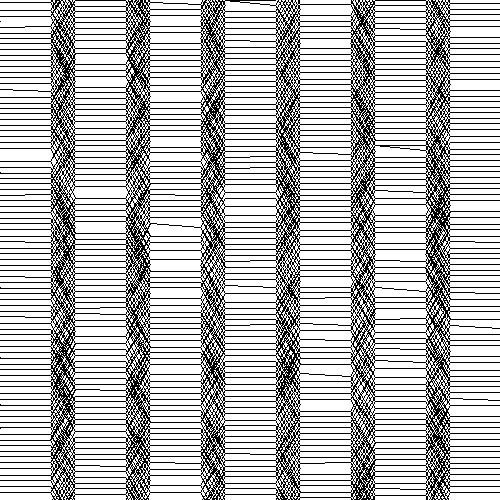

In [245]:
# run it all
SCALE = 50.
SIZE = 500
im = Image.new('RGB', (SIZE, SIZE), WHITE)
draw = ImageDraw.Draw(im)

for otr in allsides:
    #print(otr)
    sotr = otr[0][0]*SCALE, otr[0][1]*SCALE, otr[1][0]*SCALE, otr[1][1]*SCALE
    draw.line(sotr, fill=BLACK, width=1)
    
#im.show()
im.save('pil-cp07.jpg', quality=95)
im

---
_Другой подход_ 2021-07-22 0.2

In [4]:
# imports
from PIL import Image, ImageDraw
from math import sin, cos, pi, sqrt
import copy

In [6]:
# picture size inpixels
SIZE = 500

# colors
WHITE = 255, 255, 255
BLACK = 0, 0, 0
RED = 255, 0, 0
GREEN = 0, 255, 0
BLUE = 0, 0, 255

# math const
GRAD = pi / 180.  # 1 degree in radians

# math setup
RDIG = 3    # round to rdig digits after decimal point
LIM = 10.   # size of picture in relative values
DELTA = .2  # delta

# math recalc
XX = 1.5
XH = sqrt(3.)
XY = XX / 2.
COS60 = 0.5
SIN60 = sin(60. * GRAD)
print(f"{XX=}, {XY=}, {XH=}, {SIN60=}, {COS60=}")

# draw recalc
SCALE = SIZE / LIM   # mult to draw
LMIN = -LIM * 0.2    # exclude hexes with center less than LMIN
LMAX = LIM * 1.2     # exclude hexes with center greater than LMAX
print(f"{SIZE=}, {LIM=}, {DELTA=}, {RDIG=}, {SCALE=}, {LMIN=}, {LMAX=}")

SCOS60 = int(SCALE * COS60)
SSIN60 = int(SCALE * SIN60)
print(f"{SCOS60=}, {SSIN60=}")


XX=1.5, XY=0.75, XH=1.7320508075688772, SIN60=0.8660254037844386, COS60=0.5
SIZE=500, LIM=10.0, DELTA=0.2, RDIG=3, SCALE=50.0, LMIN=-2.0, LMAX=12.0
SCOS60=25, SSIN60=43


In [322]:
def inlim(x, y):
    """ check if x, y is within LIMits """
    ...

In [324]:
def inallhex(x, y):
    """ check if x, y is already in list of nodes """
    ...

In [325]:
def addhex(x, y):
    """ add node to list """
    ...

In [326]:
def makearound(x, y):
    """ make nodes around x, y """
    ...

In [1]:
def correct(x, y):
    """ make correction of x, y: 
    round them, 
    correct if they are in list of points, 
    or add new x, y to the list
    """
    ...

In [2]:
def gohex(x, y):
    """ try to put hex here
    and all around
    """
    x, y = correct(x, y)
    if not inlim(x, y): return
    if inallhex(x, y):  return

    addhex(x, y)
    
    makearound(x, y)
    

In [340]:
def gosides():
    """ create all sides for existing list of nodes"""
    ...

In [315]:
def showhex():
    """ show only nodes """
    for hexa in allhex:
        draw.point((int(hexa[0]*SCALE), int(hexa[1]*SCALE)), RED)

In [316]:
def showall():
    """ show whole picture """
    for otr in allsides:
        sotr = otr[0][0]*SCALE, otr[0][1]*SCALE, otr[1][0]*SCALE, otr[1][1]*SCALE
        draw.line(sotr, fill=BLACK, width=1)

In [343]:
# reinit start
allhex = set()
allsides = set()
allpoints = set()


In [311]:
start = LIM / 2.
gohex(start, start)
#gosides()

In [342]:
print(f"allhex: {len(allhex)}, allsides: {len(allsides)}")
print("\nallhex:", sorted(allhex))
print("\nallpoints:", sorted(allpoints))
print("\nallsides:", sorted(allsides))

allhex: 0, allsides: 0

allhex: []

allpoints: []

allsides: []


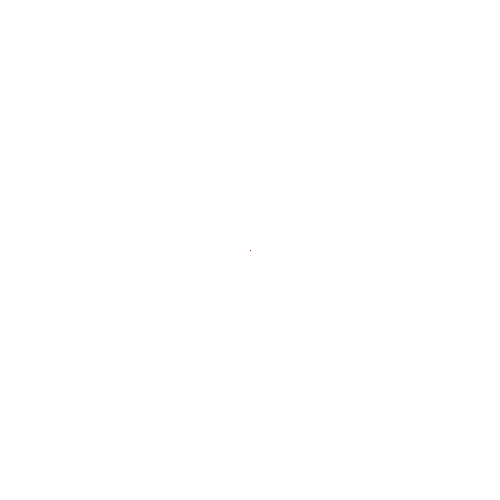

In [313]:
# run it all
im = Image.new('RGB', (SIZE, SIZE), WHITE)
draw = ImageDraw.Draw(im)

showhex()
#showall()
    
#im.show()
im.save('pil-cp07.jpg', quality=95)
im

---
_Ещё другой подход_

In [329]:
pass